---

Imports 

---


In [8]:
import importlib
import pipeline as pl
importlib.reload(pl)
import model as ml
importlib.reload(ml)

import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt


---

Load Augmented data from pipeline

---

In [2]:
csv_path = "cancer_dataset.csv"
train, test = pl.loadprocesseddata(csv_path)

Found 104001 validated image filenames belonging to 26 classes.
Found 26001 validated image filenames belonging to 26 classes.


---

Build Model

---

In [3]:
model =ml.build_model(train)
model.summary()

c:\Users\ckell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,167,482 (8.27 MB)

 Trainable params: 2,166,842 (8.27 MB)

 Non-trainable params: 640 (2.50 KB)

---

Train Model

---

In [4]:
history = ml.train_model(model, train, test, epochs=20)

c:\Users\ckell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
3251/3251 ━━━━━━━━━━━━━━━━━━━━ 1666s 512ms/step - accuracy: 0.5764 - loss: 1.1780 - val_accuracy: 0.6978 - val_loss: 0.8116
Epoch 2/20
3251/3251 ━━━━━━━━━━━━━━━━━━━━ 1431s 440ms/step - accuracy: 0.7960 - loss: 0.5016 - val_accuracy: 0.6865 - val_loss: 1.1680
Epoch 3/20
3251/3251 ━━━━━━━━━━━━━━━━━━━━ 1363s 419ms/step - accuracy: 0.8488 - loss: 0.3803 - val_accuracy: 0.7225 - val_loss: 0.9409
Epoch 4/20
3251/3251 ━━━━━━━━━━━━━━━━━━━━ 1257s 387ms/step - accuracy: 0.8774 - loss: 0.3145 - val_accuracy: 0.8085 - val_loss: 0.7110
Epoch 5/20
3251/3251 ━━━━━━━━━━━━━━━━━━━━ 1383s 425ms/step - accuracy: 0.8904 - loss: 0.2811 - val_accuracy: 0.8095 - val_loss: 0.7352
Epoch 6/20
3251/3251 ━━━━━━━━━━━━━━━━━━━━ 1564s 481ms/step - accuracy: 0.9020 - loss: 0.2513 - val_accuracy: 0.8106 - val_loss: 0.6247
Epoch 7/20
3251/3251 ━━━━━━━━━━━━━━━━━━━━ 1575s 485ms/step - accuracy: 0.9069 - loss: 0.2385 - val_accuracy: 0.7915 - val_loss: 0.7462
Epoch 8/20
3251/3251 ━━━━━━━━━━━━━━━━━━━━ 1598s 492ms/s

---

Plot Learning Curve

---

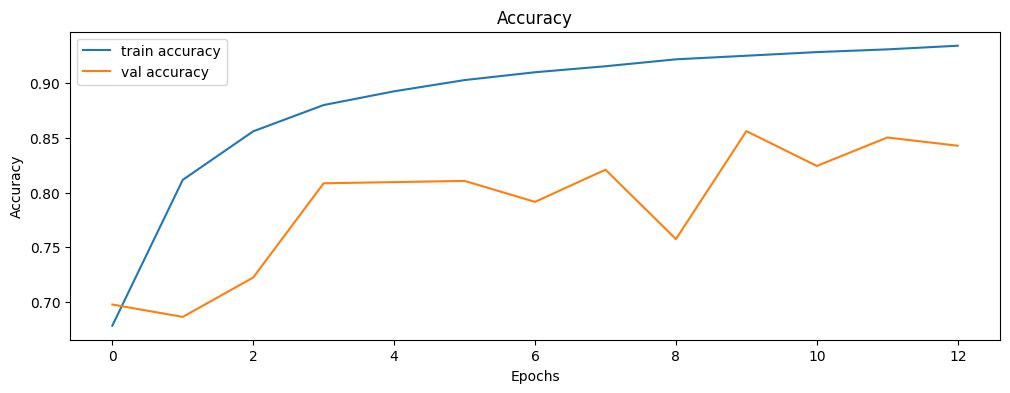

In [9]:
plt.figure(figsize=(12, 4))
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

---

Obtain Model Metrics

---

In [10]:
y_pred = model.predict(test, verbose=1)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = test.classes

results = classification_report(y_true, y_pred_classes)

print(results)


813/813 ━━━━━━━━━━━━━━━━━━━━ 58s 71ms/step
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1000
           1       0.98      1.00      0.99      1000
           2       1.00      1.00      1.00      1000
           3       1.00      1.00      1.00      1000
           4       0.95      0.95      0.95      1000
           5       0.95      0.74      0.83      1000
           6       0.81      0.98      0.89      1000
           7       0.70      0.99      0.82      1000
           8       0.99      0.61      0.75      1000
           9       0.98      1.00      0.99      1000
          10       0.98      0.96      0.97      1000
          11       0.97      0.97      0.97      1000
          12       0.98      0.99      0.99      1000
          13       0.98      0.96      0.97      1000
          14       1.00      0.40      0.57      1000
          15       0.63      1.00      0.77      1000
          16       0.78      0.89     